# Session 7: Machine Learning (Decision Trees & Random Forest)
MSA 8010: Data Programming

Agenda:
- Decision Trees
- Random Forests

Sources:
- https://jakevdp.github.io/PythonDataScienceHandbook/
- https://en.wikipedia.org/wiki/Entropy_(information_theory)
- https://algobeans.com/2016/07/27/decision-trees-tutorial/
- https://www.kaggle.com/vipulgandhi/a-guide-to-decision-trees-for-beginners
- https://www.kaggle.com/shirantha/bank-marketing-data-a-decision-tree-approach
- https://www.analyticssteps.com/blogs/what-gini-index-and-information-gain-decision-trees
- https://www.kaggle.com/sunaysawant/mushroom-classification-random-forest-100
- https://www.kaggle.com/jnduli/decision-tree-classifier-for-mushroom-dataset
- https://www.kaggle.com/hamelg/python-for-data-29-decision-trees
- https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset/notebook



### Decision Trees

- Decision trees are extremely intuitive ways to classify or label objects.
- Each internal node represents a "test" on an attribute.


For example, having the following data, we want to create a model to predict (or tell us) is it a good day to play golf?
<table class="pd-table">
<thead>
<tr>
<th align="center">Day</th>
<th align="center">Weather</th>
<th align="center">Temperature</th>
<th align="center">Humidity</th>
<th align="center">Wind</th>
<th align="center">Play?</th>
</tr>
</thead>
<tbody>
<tr>
<td align="center">1</td>
<td align="center">Sunny</td>
<td align="center">Hot</td>
<td align="center">High</td>
<td align="center">Weak</td>
<td align="center">No</td>
</tr>
<tr>
<td align="center">2</td>
<td align="center">Cloudy</td>
<td align="center">Hot</td>
<td align="center">High</td>
<td align="center">Weak</td>
<td align="center">Yes</td>
</tr>
<tr>
<td align="center">3</td>
<td align="center">Sunny</td>
<td align="center">Mild</td>
<td align="center">Normal</td>
<td align="center">Strong</td>
<td align="center">Yes</td>
</tr>
<tr>
<td align="center">4</td>
<td align="center">Cloudy</td>
<td align="center">Mild</td>
<td align="center">High</td>
<td align="center">Strong</td>
<td align="center">Yes</td>
</tr>
<tr>
<td align="center">5</td>
<td align="center">Rainy</td>
<td align="center">Mild</td>
<td align="center">High</td>
<td align="center">Strong</td>
<td align="center">No</td>
</tr>
<tr>
<td align="center">6</td>
<td align="center">Rainy</td>
<td align="center">Cool</td>
<td align="center">Normal</td>
<td align="center">Strong</td>
<td align="center">No</td>
</tr>
<tr>
<td align="center">7</td>
<td align="center">Rainy</td>
<td align="center">Mild</td>
<td align="center">High</td>
<td align="center">Weak</td>
<td align="center">Yes</td>
</tr>
<tr>
<td align="center">8</td>
<td align="center">Sunny</td>
<td align="center">Hot</td>
<td align="center">High</td>
<td align="center">Strong</td>
<td align="center">No</td>
</tr>
<tr>
<td align="center">9</td>
<td align="center">Cloudy</td>
<td align="center">Hot</td>
<td align="center">Normal</td>
<td align="center">Weak</td>
<td align="center">Yes</td>
</tr>
<tr>
<td align="center">10</td>
<td align="center">Rainy</td>
<td align="center">Mild</td>
<td align="center">High</td>
<td align="center">Strong</td>
<td align="center">No</td>
</tr>
</tbody>
</table>

Based on these data, the decision-tree would be:
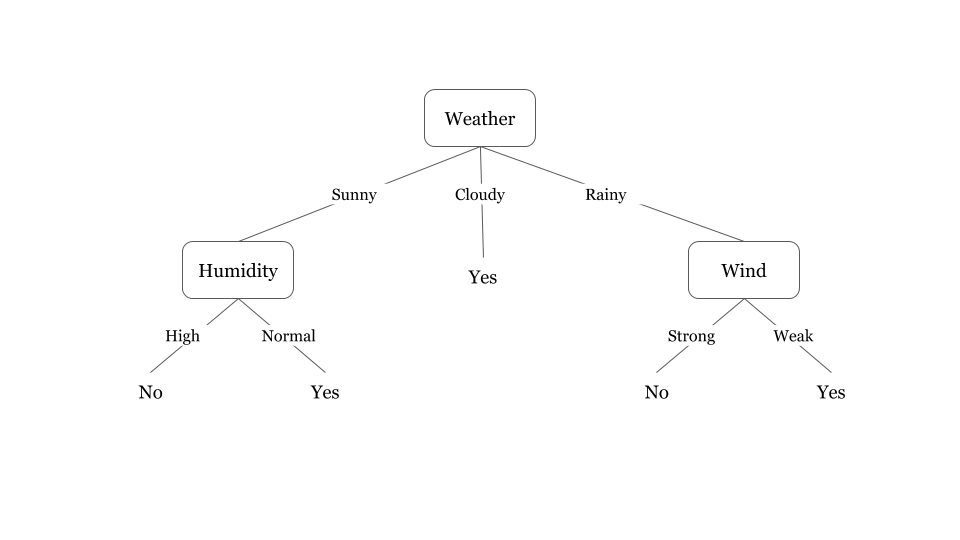

But how the algorithm finds such a model based on data?

A general algorithm for a decision tree can be described as follows:


**Step 1:** Identify the binary question that splits data points into two groups that are most homogeneous.

**Step 2:** Repeat Step 1 for each node, until a stopping criterion is reached.

<img src="decision-tree-tutorial-animated3.gif" />

There are various possible stopping criteria. For example:

- Stop when data points at the leaf are all of the same predicted category/value
- Stop when the leaf contains less than five data points
- Stop when further branching does not improve homogeneity beyond a minimum threshold

#### Entropy

When building a supervised classification model, the frequency distribution of attribute values is a potentially important factor in determining the relative importance of each attribute at various stages in the model building process.

In data modeling, we can use frequency distributions to compute ***entropy***, a measure of disorder (impurity) in a set.

We compute the entropy of multiplying the proportion of instances with each class label by the log of that proportion, and then taking the negative sum of those terms.

$entropy(S) = - p_1 log_2 (p_1) - p_2 log_2 (p_2)$

where $p_i$ is proportion (relative frequency) of class *i* within the set *S*.

#### Example
[The UCI mushroom dataset](https://archive.ics.uci.edu/ml/datasets/mushroom)

In [1]:
import pandas as pd
df = pd.read_csv('data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

#### Cap surface observations

In [3]:
df.groupby(['cap-surface'])['class'].value_counts().to_frame()

class
cap-surface class       
f           e       1560
            p        760
g           p          4
s           p       1412
            e       1144
y           p       1740
            e       1504

- `Grooves(g)` cap surface mushrooms has only poisonous mushrooms and are very less in numbers.
- `Smooth(s)` & `Scaly(y)` cap surface mushrooms has more poisonous mushrooms.
-  `Fibrous(f)` cap surface mushrooms has more edible mushrooms.

#### Cap color observations

In [4]:
# Cap colors
df.groupby(['cap-color'])['class'].value_counts().to_frame()

class
cap-color class       
b         p        120
          e         48
c         e         32
          p         12
e         p        876
          e        624
g         e       1032
          p        808
n         e       1264
          p       1020
p         p         88
          e         56
r         e         16
u         e         16
w         e        720
          p        320
y         p        672
          e        400

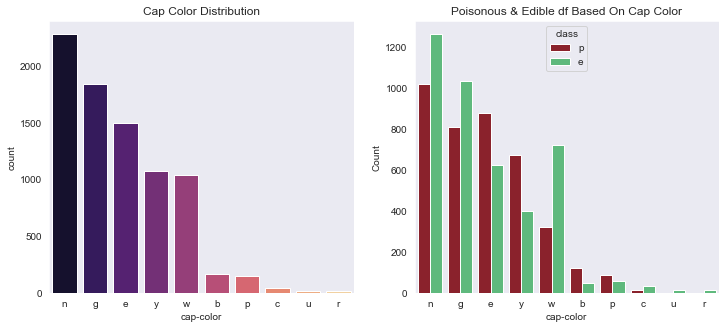

In [5]:
fig, axarr = plt.subplots(1, 2, figsize=(12,5))
a = sns.countplot(df['cap-color'], ax=axarr[0], order=df['cap-color'].value_counts().index, palette="magma").set_title('Cap Color Distribution')
axarr[1].set_title('Poisonous & Edible df Based On Cap Color')
b = sns.countplot(x="cap-color", data=df, hue="class", order=df['cap-color'].value_counts().index, palette=('#9b111e','#50c878'), ax=axarr[1]).set_ylabel('Count')

- `Brown(n)` colored mushrooms are more in number followed by `gray(g)` & `red(e)`.
- Most of the `brown(n)`, `white(w)` & `gray(g)` colored mushrooms are edible whereas most of the `red(e)`, `yellow(y)` colored mushrooms are poisonous.
- All `purple(u)` & `green(r)` colored mushrooms are edible but they are less in numbers.

#### Exercise #1

- What are your observations about mushrooms' `odor`? (i.e., poisonous and edible mushroom based on the odor)

In [6]:
import numpy as np

clean_instances = np.where(df['class'] == 'e')[0]
print("Clean instances:", len(clean_instances))

poisonous_instances = np.where(df['class'] == 'p')[0]
print("Poisonous instances:", len(poisonous_instances))

print("All instances:", len(df))

Clean instances: 4208
Poisonous instances: 3916
All instances: 8124


We know that the proportion of `clean_instances` that are labeled `'e'` (class `edible`) in the UCI dataset is:
- $4208 \div 8124 = 0.517$

And, the proportion labeled `'p'` (class `poisonous`) is:
- $3916 \div 8124 = 0.482$.

Then, to calculate the entropy, we can use a python code.

$entropy(S) = - p_1 log_2 (p_1) - p_2 log_2 (p_2)$

where $p_i$ is proportion (relative frequency) of class *i* within the set *S*.

In [7]:
import math

entropy = \
    - (len(clean_instances) / len(df)) * math.log(len(clean_instances) / len(df), 2) \
    - (len(poisonous_instances) / len(df)) * math.log(len(poisonous_instances) / len(df), 2)
print(entropy)

0.9990678968724604


$entropy(S) =  -\sum_{i=1}^n {p_i \log_2 (p_i)}$

where $p_i$ is proportion (relative frequency) of class *i* within the set *S*.

#### Exercise #2

1. Define a function, `entropy(instances)`, that computes and returns the entropy of a dataframe (i.e., `instances` parameter). You may assume the class label is in the last column.

1. Test the function by passing the UCI mushroom's dataset.

_**Note**: the function should extract number of labels from the label (i.e., the last) column._

### Information Gain

**Information Gain = Entropy before splitting - Entropy after splitting**

Informally, a decision tree is constructed from a set of instances using a recursive algorithm that 

* splits the set into subsets based on the values of each attribute
* selects the *best* attribute based on information gain (or other criteria) on each of the splits
* repeats the process on each of these subsets until a stopping condition is met based on the remaining attributes (e.g., a subset has no instances or has instances which all have the same class label)

Entropy is a metric that can be used in selecting the best attribute for each split: the best attribute is the one resulting in the *largest decrease in entropy* for a set of instances. [Note: other metrics can be used for determining the best attribute]

*Information gain* measures the decrease in entropy that results from splitting a set of instances based on an attribute.

$IG(S, a) = entropy(S) - [p(s_1) × entropy(s_1) + p(s_2) × entropy(s_2) ... + p(s_n) × entropy(s_n)]$

Where 
* $n$ is the number of distinct values of attribute $a$
* $s_i$ is the subset of $S$ where all instances have the $i$th value of $a$
* $p(s_i)$ is the proportion of instances in $S$ that have the $i$th value of $a$

### Gini Index

The gini index, or gini coefficient, or gini impurity computes the degree of probability of a specific variable that is wrongly being classified when chosen randomly and a variation of gini coefficient. 

It works on categorical variables, provides outcomes either be “successful” or “failure” and hence conducts binary splitting only.

$$
\operatorname{Gini}(P)=\sum_{i=1}^{n} p_{i}\left(1-p_{i}\right)=1-\sum_{i=1}^{n}\left(p_{i}\right)^{2}
$$

- where $P=(p_1, p_2, ..., p_n)$ , and $p_i$ is the probability of an object that is being classified to a particular class.

The degree of gini index varies from 0 to $1-\frac{1}{n}$:

- 0: all the elements are in the same class. 
- $1-\frac{1}{n}$: the elements are uniformly distributed into some classes.

#### Gini Index vs. Information Gain

- Gini index is more efficient (simpler to calculate)
- While working on categorical data variables, gini index gives results either in “success” or “failure” and performs binary splitting only, in contrast to this, information gain measures the entropy differences before and after splitting and depicts the impurity in class variables.

### An example with sklearn

#### UCI's mushroom dataset classification with a decision tree

In [8]:
from sklearn.model_selection import train_test_split


# split the data int x(training data) and y (results)
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)

In [9]:
print(x.info())
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.4 KB
None


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   e       8124 non-null   uint8
 1   p       8124 non-null   uint8
dtypes: uint8(2)
memory usage: 16.0 KB


In [11]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [12]:
parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5],
              'max_depth':[9,10,11,12],
             }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model

DecisionTreeClassifier(max_depth=9)

In [13]:
score = model.score(X_test, y_test)
score #The score is great! But, isn't it overfitting?

1.0

We can install and use the `graphviz` library to visualize any structural information, such as a decision tree.

- `conda install -c conda-forge python-graphviz`

Or,

- `pip install graphviz`

In [14]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_train.columns,
                                class_names=y_train.columns,
                                filled=True, rounded=True,
                                special_characters=True,
                                precision=5)
graph = graphviz.Source(dot_data)

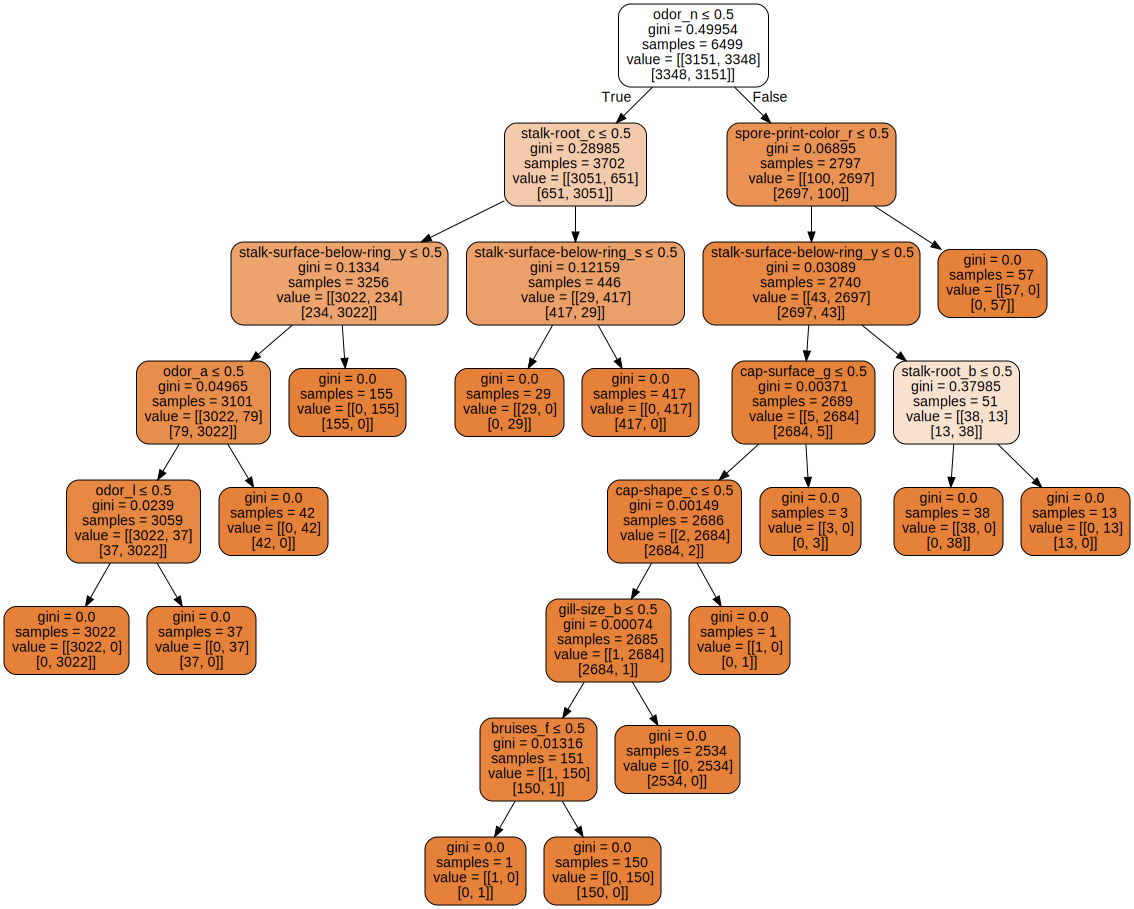

In [15]:
graph

#### Exercise #3

1. Define a function, `gini(instances)`, that computes and returns the gini index of a dataframe (i.e., `instances` parameter). You may assume the class label is in the last column.

1. Test the function by passing `y_train`.

_**Note**: the function should extract number of labels from the label (i.e., the last) column._

### Decision Tree's Limitation
- Using the best binary question to split the data at the start may not lead to the most accurate predictions.
    - Sometimes, less effective splits used initially may lead to even better predictions subsequently.

To overcome this issue, we can use a Random Forest, or use the gradient boosting technique.

##### Random Forest

To resolve this, we can choose different combinations of binary questions to grow multiple trees, and then use the aggregated prediction of those trees. 

This technique is called a **random forest**.

##### Gradient Boosting

Or, instead of combining binary questions randomly, we can strategically select them, such that the prediction accuracy for each subsequent tree improves incrementally. Then, a weighted average of predictions from all trees is taken. 

This technique is called **gradient boosting**.

While random forest and gradient boosting tend to produce more accurate predictions, their complexity renders the solution harder to visualize. 

Hence, they are often called “black-boxes”.

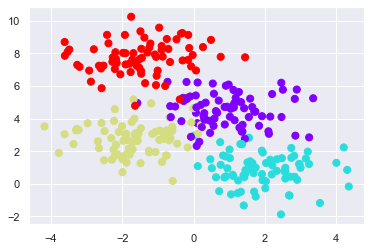

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs

blob_X, blob_y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(blob_X[:, 0], blob_X[:, 1], c=blob_y, s=50, cmap='rainbow');

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion.

Then, each level assign the label of the new region according to a majority vote of points within it.

For example:

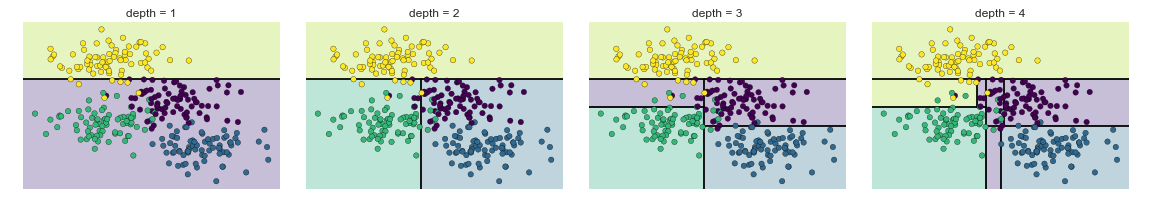

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(blob_X, blob_y)

To Visualizing the Decision Tree using a helper function.

To use the helper, you need to install the `ipywidgets` package with conda:
- `conda install -c conda-forge ipywidgets`

or pip:
- `pip install ipywidgets`


interactive(children=(Dropdown(description='depth', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_classes…

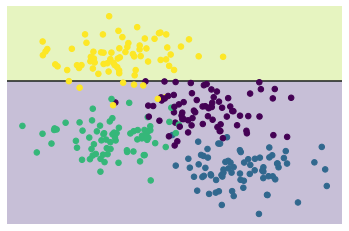

In [18]:
import helper
helper.plot_tree_interactive(blob_X, blob_y);

#### More depth = more accuracy = overfitting danger!

- even at only five levels deep, is clearly over-fitting our data.

Suppose we have two decision trees on the same data

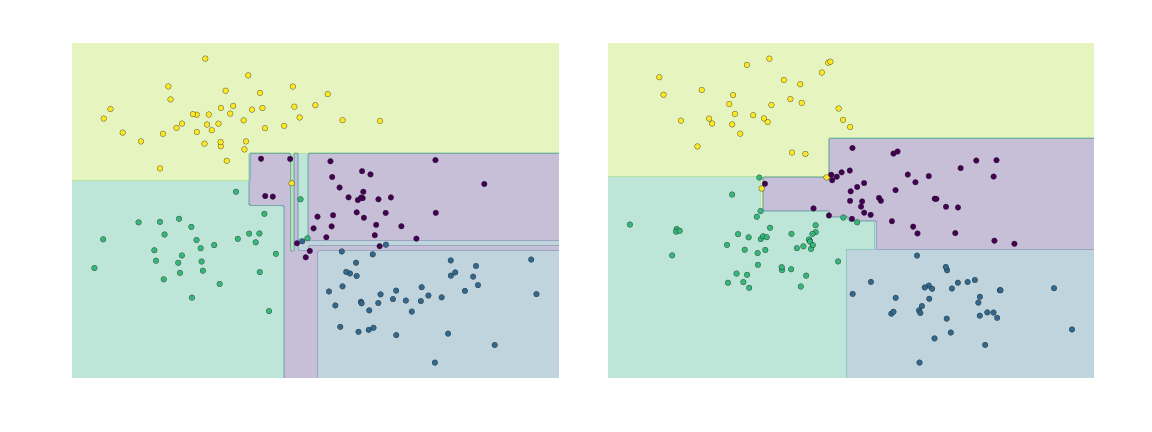

Which one is better?

- At some areas, the two trees produce consistent results:
    - For example, in the four corners.
- In other places, the two trees give very different classifications:
    - For example, in the regions between any two clusters).
- The inconsistencies tend to happen where the classification is less certain.
- By using information from both of these trees, we might come up with a better result!
    - Multiple overfitting estimators can be combined to reduce the effect of this overfitting.

In [19]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

### Feature importance

In [20]:
fi_df = pd.DataFrame({
    "feature_importances" : model.feature_importances_,
    "features" : x.columns
})

print(fi_df)

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)

     feature_importances     features
0               0.001662  cap-shape_b
1               0.000149  cap-shape_c
2               0.001383  cap-shape_f
3               0.000499  cap-shape_k
4               0.000610  cap-shape_s
..                   ...          ...
112             0.000952    habitat_l
113             0.003264    habitat_m
114             0.004769    habitat_p
115             0.010215    habitat_u
116             0.002913    habitat_w

[117 rows x 2 columns]


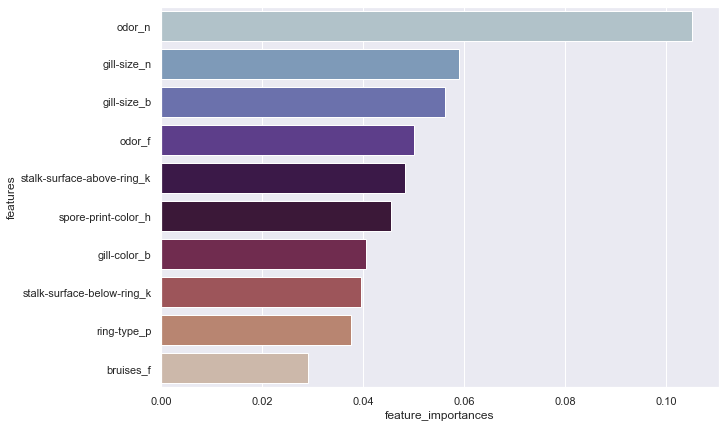

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(x="feature_importances", y="features", palette="twilight", data=fi_df.head(10))
plt.show()

In [22]:
model.score(x_test, y_test)

1.0

Based on this dataset, the model's accuracy is 100%. 

Since the dataset is limited and poisenous and edible mushrooms are relatively easy to detect, then overfitting in this case might be okay.